# Setup

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [8]:
reddit_df = pd.read_csv('./data/combined_cleaned_500k.csv',  lineterminator='\n', encoding='utf8')

In [9]:
reddit_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r
0,i think most singaporeans dont give a damn who...,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
1,fair point the secrecy aspect of it slipped my...,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
3,gt this is binary thinking because you think t...,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
4,boo boo poor u lmao,2020-10-31 13:52:12,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."


In [12]:
# convert data to appropriate datatypes
reddit_df['text'] = reddit_df['text'].astype(str)
reddit_df['timestamp'] = pd.to_datetime(reddit_df['timestamp'])
reddit_df['username'] = reddit_df['username'].astype(str)
reddit_df['link'] = reddit_df['link'].astype(str)
reddit_df['link_id'] = reddit_df['link_id'].astype(str)
reddit_df['parent_id'] = reddit_df['parent_id'].astype(str)
reddit_df['id'] = reddit_df['id'].astype(str)
reddit_df['subreddit_id'] = reddit_df['subreddit_id'].astype(str)
reddit_df['moderation\r'] = reddit_df['moderation\r'].tolist()

In [13]:
# extract date from datetime stamp
reddit_df['timestamp'] = reddit_df['timestamp'].dt.date
reddit_df['timestamp'].head()

0    2020-04-11
1    2020-04-03
2    2020-02-15
3    2020-06-04
4    2020-10-31
Name: timestamp, dtype: object

# Number of Comments across Time

In [15]:
# count number of comments per day
num_of_comments_per_day_df = reddit_df.groupby('timestamp')['id'].count()

In [21]:
num_of_comments_per_day_df.head()

timestamp
2020-01-01    128
2020-01-02    171
2020-01-03    195
2020-01-04    156
2020-01-05    180
Name: id, dtype: int64

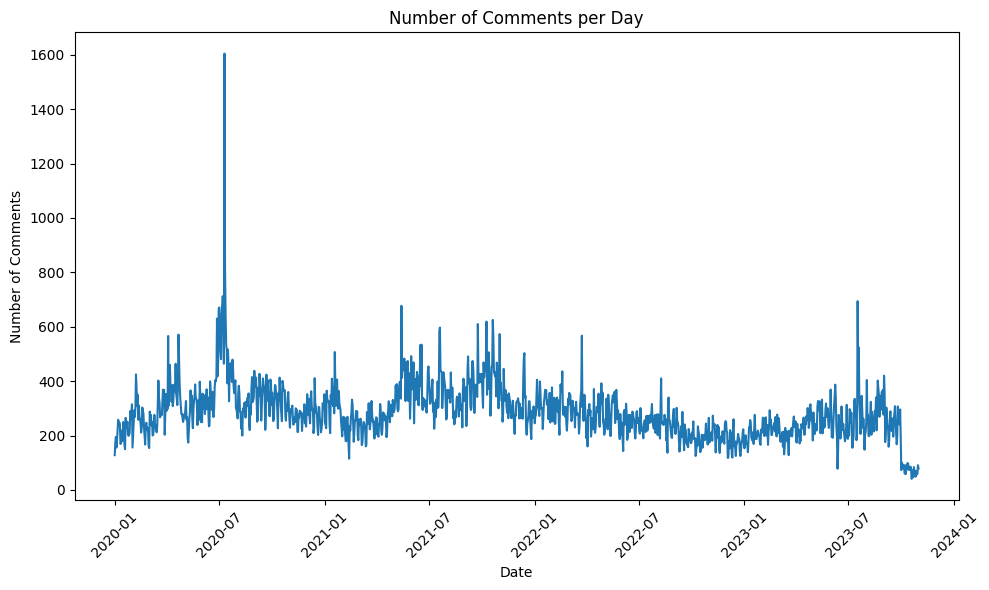

In [17]:
# plot number of comments against time
plt.figure(figsize=(10,6))
plt.plot(num_of_comments_per_day_df.index, num_of_comments_per_day_df.values)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Days with Most Number of Comments

In [24]:
# number of comments sorted in descending order
sorted_num_of_comments_per_day_df = num_of_comments_per_day_df.sort_values(ascending=False)

In [25]:
sorted_num_of_comments_per_day_df.head()

timestamp
2020-07-10    1604
2020-07-11     813
2020-07-07     712
2023-07-17     694
2020-07-06     680
Name: id, dtype: int64

2 important dates and events stand out from this table: 10 July 2020 is polling day, and 17 July 2023 was the news breaking out that Speaker Tan Chuan-Jin and Tampines GRC MP Cheng Li Hui resigned over an affair.

We can double-check if the reddit comments were indeed about those events.

## Check Polling Day

In [50]:
# filter date for 10 july 2020
polling_day_df = reddit_df[reddit_df['timestamp'] == datetime.date(2020, 7, 10)]

In [57]:
# expand resolution to see full text
pd.set_option('display.max_colwidth', None)

polling_day_df['text'].head(20)

83                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              they could technically retire an mp in a smc to trigger a by election
163                                                                                                                                                                                                                                                                                                                                                                                                                                    my sense as

The text data confirms that most of Reddit comments on Polling Day (10 July 2020) were about Polling Day and singaporean politics, including how it is affecting lives of Singaporeans.

# Check 17 July 2023

In [54]:
seventeen_july_twentytwentythree_df = reddit_df[reddit_df['timestamp'] == datetime.date(2023, 7, 17)]

In [56]:
seventeen_july_twentytwentythree_df['text'].head(20)

236840                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               idk if people call me low ses i love encik tan
236844                                                                                              

Again, the text data confirms that most of Reddit comments on 17 July 2023 were about Speaker Tan Chuan-Jin and Tampines GRC MP Cheng Li Hui's affair in light of the news of their resignations.